In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data = pd.read_json("https://pomber.github.io/covid19/timeseries.json")

In [8]:
#taking a look at the structure of data for a specefic country
data["US"].head()

0    {'date': '2020-1-22', 'confirmed': 1, 'deaths'...
1    {'date': '2020-1-23', 'confirmed': 1, 'deaths'...
2    {'date': '2020-1-24', 'confirmed': 2, 'deaths'...
3    {'date': '2020-1-25', 'confirmed': 2, 'deaths'...
4    {'date': '2020-1-26', 'confirmed': 5, 'deaths'...
Name: US, dtype: object

In [9]:
#the objective is to create a table of countries and dates as columns with confirmed cases as values
data_to_use = pd.DataFrame()

In [10]:
#creating a dates column

#making a list of countries
countries = data.columns

dates = []
for x,y in zip(range(0,len(data)),countries):
    date_extracted = data[y][x]["date"]
    dates.append(date_extracted)
data_to_use["date"]=dates

In [11]:

#adding ccountries as columns
for i in countries:
    data_to_use[i] = 0
    data_to_use[i] = data_to_use[i].astype(float)

In [12]:
#updating values of cells to confirmed cases
for country in countries:
    for x in range(0,len(data)):
        data_to_use.at[x,country] = data[country][x]["confirmed"]
    

In [13]:
#previewing results
for i in countries:
    data_to_use[i].astype(float)
data_to_use.tail(20)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
100,2020-5-1,2335.0,782.0,4154.0,745.0,30.0,25.0,4532.0,2148.0,6778.0,...,11.0,136.0,37.0,45.0,6.0,16.0,7.0,1.0,15.0,0.0
101,2020-5-2,2469.0,789.0,4295.0,747.0,35.0,25.0,4681.0,2273.0,6799.0,...,15.0,155.0,38.0,45.0,6.0,16.0,10.0,3.0,76.0,0.0
102,2020-5-3,2704.0,795.0,4474.0,748.0,35.0,25.0,4783.0,2386.0,6822.0,...,15.0,166.0,39.0,46.0,6.0,16.0,10.0,3.0,128.0,0.0
103,2020-5-4,2894.0,803.0,4648.0,750.0,35.0,25.0,4887.0,2507.0,6847.0,...,15.0,178.0,41.0,46.0,6.0,23.0,12.0,3.0,230.0,0.0
104,2020-5-5,3224.0,820.0,4838.0,751.0,36.0,25.0,5020.0,2619.0,6875.0,...,15.0,199.0,41.0,52.0,6.0,174.0,22.0,3.0,293.0,0.0
105,2020-5-6,3392.0,832.0,4997.0,751.0,36.0,25.0,5208.0,2782.0,6894.0,...,15.0,225.0,43.0,58.0,6.0,174.0,25.0,8.0,379.0,0.0
106,2020-5-7,3563.0,842.0,5182.0,752.0,36.0,25.0,5371.0,2884.0,6913.0,...,15.0,231.0,43.0,74.0,6.0,187.0,25.0,8.0,461.0,0.0
107,2020-5-8,3778.0,850.0,5369.0,752.0,43.0,25.0,5611.0,3029.0,6918.0,...,15.0,257.0,43.0,120.0,6.0,208.0,34.0,8.0,522.0,0.0
108,2020-5-9,4033.0,856.0,5558.0,754.0,43.0,25.0,5776.0,3175.0,6939.0,...,15.0,291.0,56.0,120.0,6.0,208.0,34.0,11.0,612.0,0.0
109,2020-5-10,4402.0,868.0,5723.0,755.0,45.0,25.0,6034.0,3313.0,6948.0,...,15.0,307.0,56.0,120.0,6.0,208.0,51.0,11.0,612.0,0.0


In [14]:
cases_data_to_use_t = data_to_use.set_index(data_to_use["date"])
cases_data_to_use_t = data_to_use.transpose(copy = True)
cases_data_to_use_t.reset_index()
cases_data_to_use_t.to_csv("cases_data_to_use_t.csv", index_label = False)

In [15]:
#creating a new cases df
new_cases_to_use = data_to_use.copy()

#updating values to new cases
for country in countries:
    for x in range(1,len(data)):
        if data_to_use[country][x-1] != 0:
            new_cases_to_use.at[x,country] = data_to_use[country][x] - data_to_use[country][x-1]
        else: 
            new_cases_to_use.at[x,country] = data_to_use[country][x]
new_cases_to_use["Japan"]

0       2.0
1       0.0
2       0.0
3       0.0
4       2.0
       ... 
115    34.0
116    48.0
117    20.0
118    62.0
119     0.0
Name: Japan, Length: 120, dtype: float64

In [16]:
#creating a growth factor df
growth_data_to_use = new_cases_to_use.copy()

In [17]:
#updating values to growth factor
for country in countries:
    for x in range(1,len(data)):
        if new_cases_to_use[country][x-1] != 0:
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x] / new_cases_to_use[country][x-1]
        else: 
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x]

In [18]:
growth_data_to_use["Bahrain"].tail(10)

110    1.766467
111    1.000000
112    0.966102
113    1.340351
114    1.007853
115    0.425974
116    1.274390
117    1.090909
118    1.526316
119    1.022989
Name: Bahrain, dtype: float64

In [19]:
growth_data_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
0,2020-1-22,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,2020-1-23,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,2020-1-24,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,2020-1-25,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,2020-1-26,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,4.000000,...,0.000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2020-5-16,0.842995,0.944444,1.026738,0.0,0.0,0.0,0.944928,1.298913,0.562500,...,0.000,0.384615,2.0,0.0,0.0,0.000000,0.761905,0.0,0.966825,0.0
116,2020-5-17,0.750716,0.764706,1.031250,0.0,0.0,0.0,0.806748,0.790795,1.111111,...,8.000,2.866667,2.5,54.0,0.0,0.000000,0.375000,0.0,0.990196,0.0
117,2020-5-18,1.557252,0.153846,0.919192,0.0,2.0,0.0,1.152091,1.857143,1.400000,...,2.375,0.325581,0.0,0.0,0.0,11.000000,0.333333,0.0,1.014851,0.0
118,2020-5-19,1.424020,0.500000,0.967033,0.0,1.0,0.0,1.445545,0.621083,0.285714,...,0.000,1.071429,0.0,0.0,0.0,0.454545,18.500000,0.0,1.009756,0.0


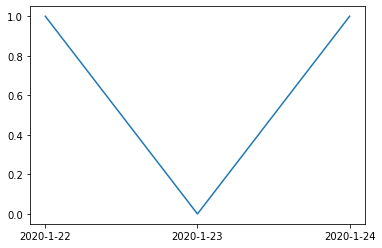

In [20]:
#plotting the data to preview
plt.plot(growth_data_to_use["date"][:3], growth_data_to_use["US"][:3] )

In [21]:
#saving growth as json
growth_data_to_use.to_json("growth.json")
#saving growth as csv
growth_data_to_use.to_csv("growth.csv")

In [22]:
#creating a decision tree for a tabel with an analysis of each country's infection rate
up_country = []
growth_factor = []
cases = []
analysis = []
avg_growth_factor_past_2_days = []
new_cases = []
for country in countries:

        
        if data_to_use[country][len(data)-10] == 0:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("New to The Pandemic") 
        elif data_to_use[country][len(data)-1] < 229 and growth_data_to_use[country][len(data)-1] <= 2 or (new_cases_to_use[country][len(data)-7] ==0 and new_cases_to_use[country][len(data)-3] ==0 and new_cases_to_use[country][len(data)-1] == 0):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Can Be Contained!")
        elif data_to_use[country][len(data)-1] < 2000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 2000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] < 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 3000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1 and new_cases_to_use[country][len(data)-1] <229):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif (data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1] >1) or new_cases_to_use[country][len(data)-1] >229)) or (new_cases_to_use[country][len(data)-30] >0 and growth_data_to_use[country][len(data)-1]>1.5):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Has Gotten Out of Control!")
        else:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("Analysis is Pending Additional Data")



      
    
growth_chart_df = pd.DataFrame()
growth_chart_df["country"] = up_country
growth_chart_df["growth_factor"]= growth_factor
growth_chart_df["cases"]= cases
growth_chart_df["analysis"]= analysis
growth_chart_df["growth_factor_mod"]= avg_growth_factor_past_2_days
growth_chart_df["new_cases"] = new_cases


In [23]:
#checking the output snapshot, reviewing if the analysis falls in correctly and no rows are missed
growth_chart_df.sort_values(by = "cases")

,country,growth_factor,cases,analysis,growth_factor_mod,new_cases
187,Lesotho,0.000000,1.0,New to The Pandemic,0.000000,0.0
182,Western Sahara,0.000000,6.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
116,Papua New Guinea,0.000000,8.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
176,MS Zaandam,0.000000,9.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
141,Suriname,0.000000,11.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
...,...,...,...,...,...,...
138,Spain,1.201856,232555.0,COVID-19 Spread Has Gotten Out of Control!,0.838263,518.0
154,United Kingdom,-0.213668,249619.0,COVID-19 Spread is Possibly Getting Under Cont...,0.340660,-519.0
21,Brazil,1.192347,291579.0,COVID-19 Spread Has Gotten Out of Control!,1.174176,19694.0
124,Russia,0.946130,308705.0,COVID-19 Spread Has Gotten Out of Control!,0.991942,8764.0


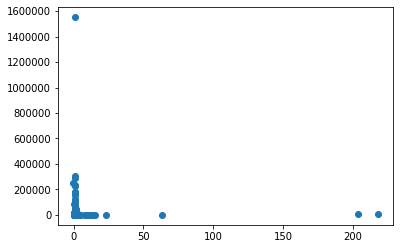

In [24]:
plt.scatter(growth_chart_df["growth_factor"],growth_chart_df["cases"])

In [25]:
growth_chart_df.to_csv("growth_category.csv")